In [253]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as mcm

dir_path = os.path.dirname(os.path.realpath("Government_Forms_Timeline.ipynb"))
filepath = f"{dir_path}/data/Latin_America_Government_Forms_1800_2019.csv"
data = pd.read_csv(filepath, sep="\t")

data.index = data["Year"]
data = data.drop("Year", axis=1)

gov_forms = {"M": "Military dictatorship",
             "DL": "Democracy - left-leaning",
             "DR": "Democracy - right-leaning",
             "DO": "Democracy - other",
             "C": "Centralist",
             "R": "Republican",
             "COL": "Colonial rule",
             "O": "Other/multiple"
             }
colors = {"M": "black",
          "DL": "red",
          "DR": "blue",
          "DO": "yellow",
          "C": "green",
          "R": "orange",
          "COL": "brown",
          "O": "grey"
          }
countries_ready = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia"]

print("Data available for:", data.shape[1], "countries, ", data.shape[0], "years (", data.index[0], "-", data.index[-1], ")\n")
data.tail()

Data available for: 20 countries,  220 years ( 1800 - 2019 )



,Argentina,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,Ecuador,El Salvador,Guatemala,Haiti,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela
Year,,,,,,,,,,,,,,,,,,,,
2015,DR,DL,DL,DL,DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,DR,DL,DO,DL,DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,DR,DL,DO,DL,DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,DR,DL,DO,DR,DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,DL,DR,DR,DR,DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


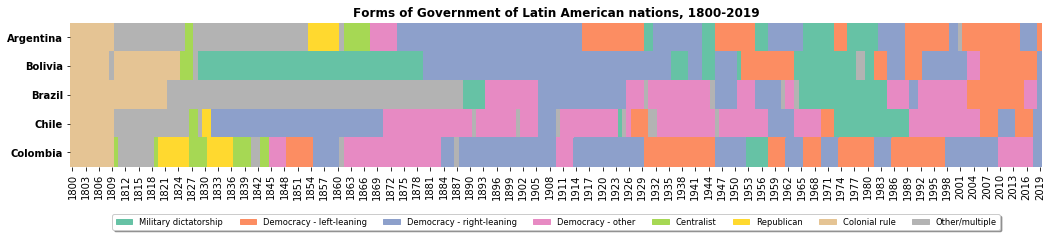

In [254]:
num_encoder = {"M": 1,
              "DL": 2,
              "DR": 3,
              "DO": 4,
              "C": 5,
              "R": 6,
              "COL": 7,
              "O": 8
              }
encoded_data = data.copy()
for col in countries_ready:
    encoded_data[col] = encoded_data[col].apply(lambda x: num_encoder[x])

# Figure setup
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax.set_position([0.08, 0.35, 0.9, 0.5])     # so that saved figure includes legend
plt.title("Forms of Government of Latin American nations, 1800-2019", fontweight="bold")
cmap = mcm.get_cmap("Set2")

# Plot heatmap
chart = sns.heatmap(encoded_data[countries_ready].T, cmap=cmap, cbar=False)
chart.set_yticklabels(chart.get_yticklabels(), fontweight="bold")
chart.set_xlabel("Year", visible=False)

# Add legend
patches = [mpatches.Patch(color=cmap((value - 1)/len(num_encoder)), label=gov_forms[key]) 
           for key, value in num_encoder.items()]
ax.legend(handles=patches, loc="upper center", bbox_to_anchor=(0.5, -0.3), 
          fancybox=True, shadow=True, ncol=8, fontsize="small")

plt.savefig("gov_forms.png", dpi = 300)
plt.show()

In [ ]:
# alternative, first approach using scatter plot

reversed_countries_ready = countries_ready.copy()
reversed_countries_ready.reverse()

dots = []
j = 0
for country in reversed_countries_ready:   
    # reverse(), so that countries appear in correct order in diagram
    # later to be replaced by data.columns
    j += 1
    country_dots = [(i, j, data[country].at[i]) for i in range(1800, 2020)]
    dots.extend(country_dots)

dots = pd.DataFrame(dots)

fig, ax = plt.subplots()
fig.set_size_inches(15, 2)
ax.set_position([0.08, 0.35, 0.9, 0.5])

for gov_form in dots[2].unique():
    selected = dots[dots[2] == gov_form]
    ax.scatter(x = selected[0], y = selected[1], color = colors[gov_form], label = gov_forms[gov_form], s = 7)

plt.grid(axis="x", linestyle="--")

tick_labels = []
for country in reversed_countries_ready:
    tick_labels.append("")
    tick_labels.append(country)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels(tick_labels, fontweight="bold")

ax.legend(loc = "upper center", bbox_to_anchor = (0.5, -0.3), 
          fancybox=True, shadow=True, ncol = 8, fontsize="small")

plt.title("Forms of Government of Latin American nations, 1800-2019", fontweight="bold")
# plt.savefig("Gov_forms.png", dpi = 300)
plt.show()